## EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rc("figure", figsize=(10, 5.5))

In [3]:
data = pd.read_csv('../data/delivery_dataset.csv')

In [4]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [5]:
data.info(), data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

(None, (45584, 20))

In [6]:
data.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [7]:
# null values exists in the dataset in multiple features

In [8]:
data[data.duplicated()]
# check for duplicates

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,43730.0,29.566911,5.815064,15.000000,25.000000,30.000000,35.000000,50.000000
Delivery_person_Ratings,43676.0,4.633774,0.334744,1.000000,4.500000,4.700000,4.900000,6.000000
Restaurant_latitude,45584.0,17.017948,8.185674,-30.905562,12.933284,18.551440,22.728163,30.914057
Restaurant_longitude,45584.0,70.229684,22.885575,-88.366217,73.170000,75.897963,78.044095,88.433452
Delivery_location_latitude,45584.0,17.465480,7.335562,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45584.0,70.844161,21.120578,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45584.0,1.023385,0.839055,0.000000,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,44591.0,0.744635,0.572510,0.000000,0.000000,1.000000,1.000000,3.000000
Time_taken (min),45584.0,26.293963,9.384298,10.000000,19.000000,26.000000,32.000000,54.000000


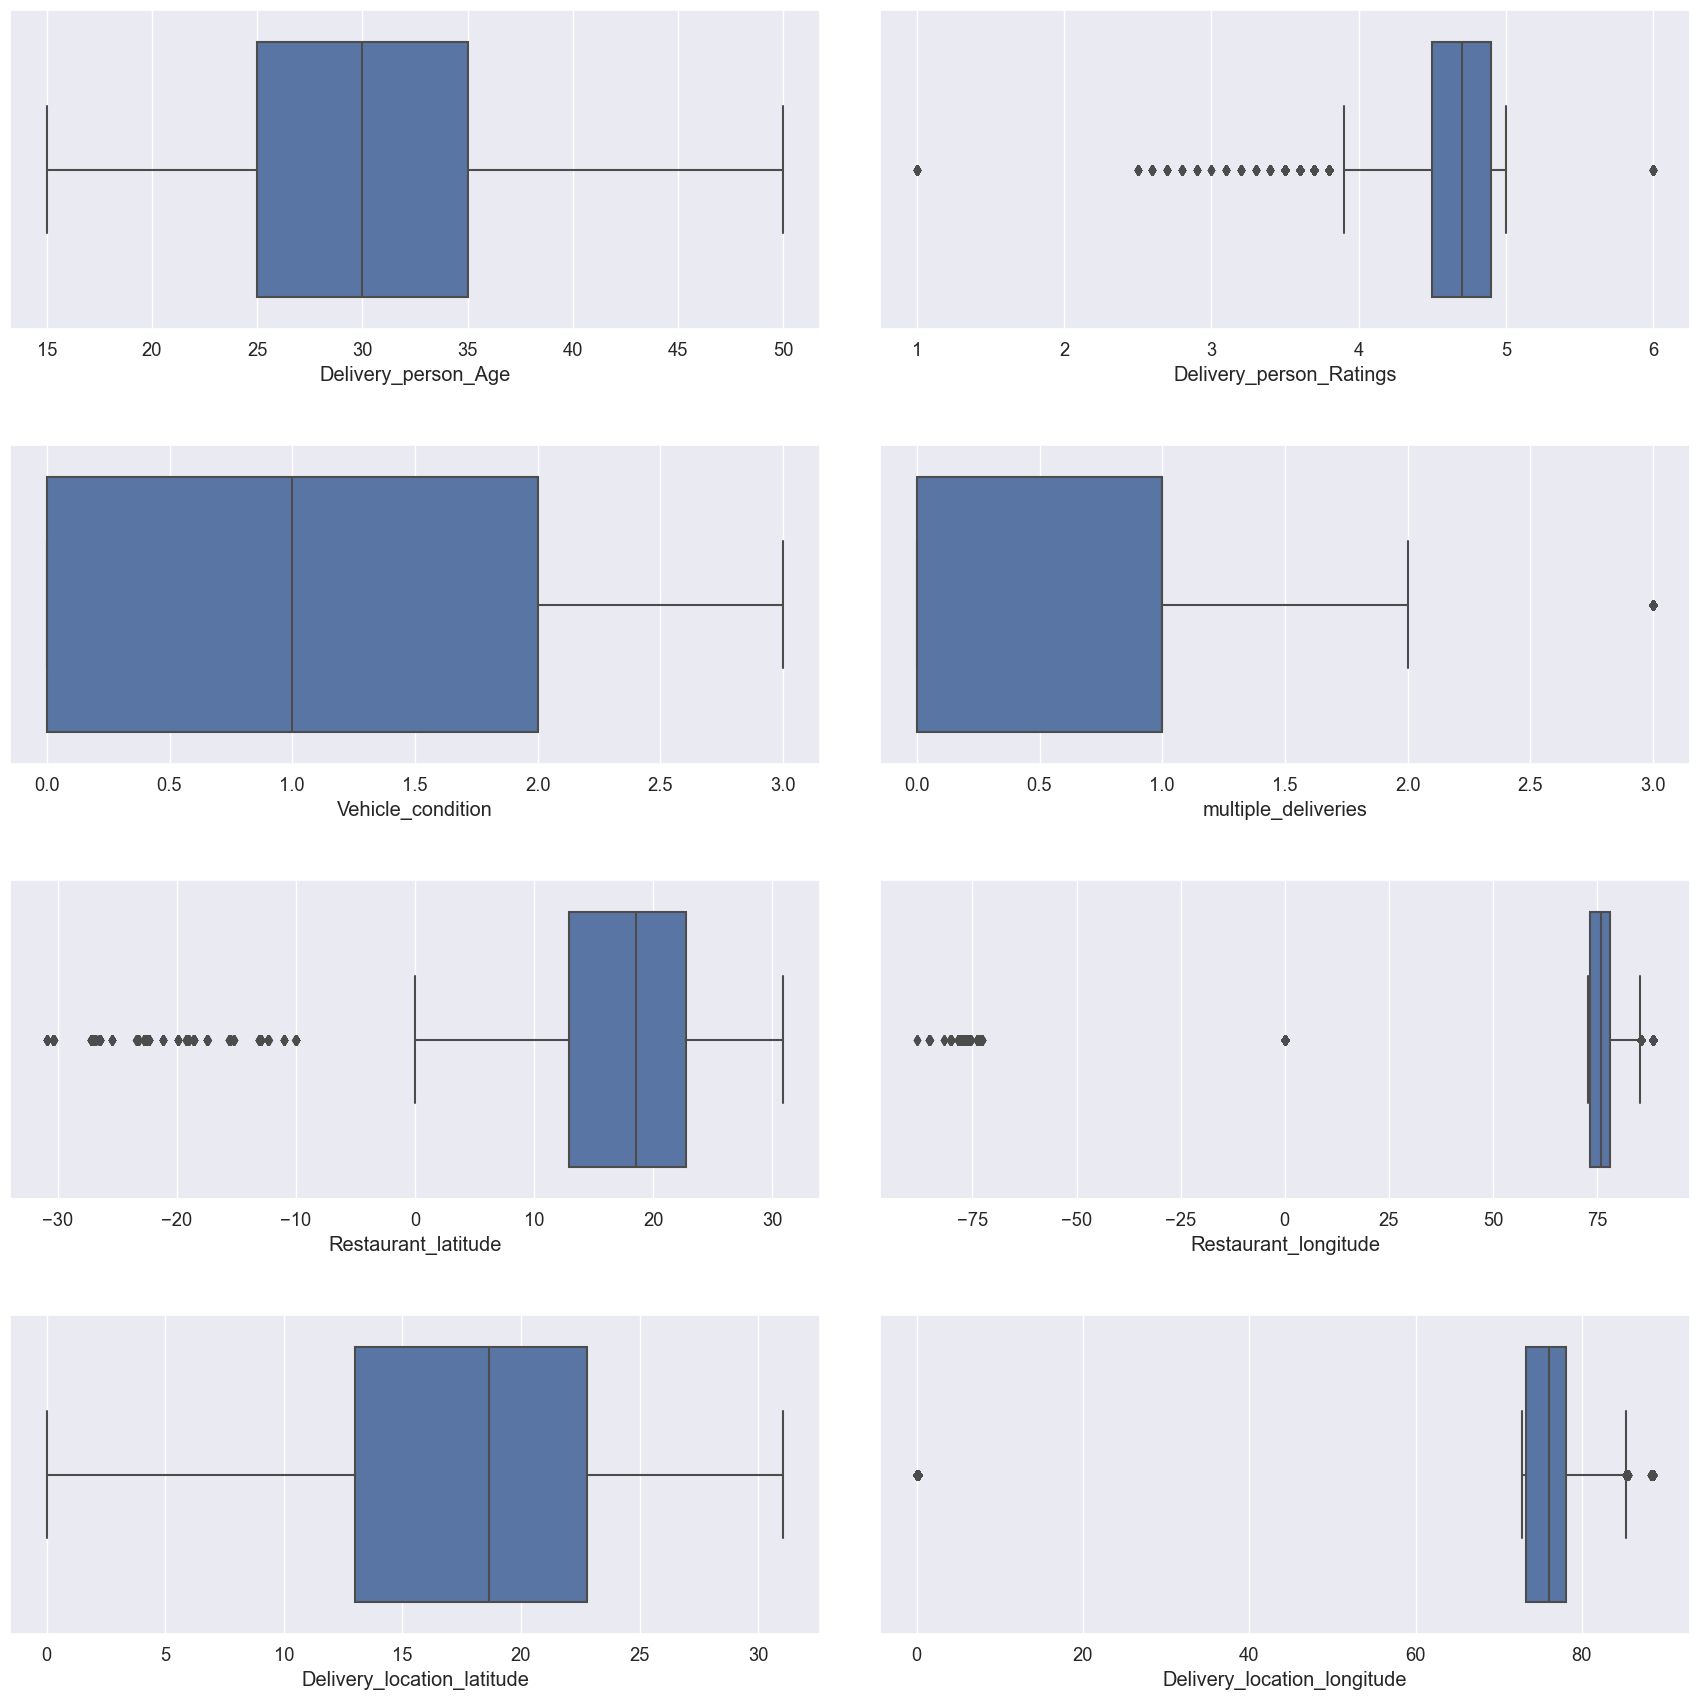

In [10]:
sns.set_theme(style='darkgrid', font_scale=1.2)
fig,ax = plt.subplots(4,2, figsize=(18,18))
sns.boxplot(data=data, x="Delivery_person_Age", ax=ax[0,0])
sns.boxplot(data=data, x="Delivery_person_Ratings", ax=ax[0,1])
sns.boxplot(data=data, x="Vehicle_condition", ax=ax[1,0])
sns.boxplot(data=data, x="multiple_deliveries", ax=ax[1,1])
sns.boxplot(data=data, x="Restaurant_latitude", ax=ax[2,0])
sns.boxplot(data=data, x="Restaurant_longitude", ax=ax[2,1])
sns.boxplot(data=data, x="Delivery_location_latitude", ax=ax[3,0])
sns.boxplot(data=data, x="Delivery_location_longitude", ax=ax[3,1])
plt.tight_layout(pad=3)

In [11]:
#There are outliers and mislabeled data in the column Delivery_person_Ratings

In [12]:
data[data["Delivery_person_Ratings"].isin([1,6])]
# 6.0 is a mislabelled rating and the same data includes multiple features with NaN values
# 1.0 ratings has samples with multiple features havind NaN values

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
2378,0x564,JAPRES15DEL03,15.0,1.0,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20,NaN,NaN,3,Meal,motorcycle,0.0,No,Urban,15
2896,0xcd0,INDORES010DEL03,15.0,1.0,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30,NaN,NaN,3,Snack,scooter,1.0,No,Metropolitian,29
2942,0x91a,SURRES17DEL03,15.0,1.0,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10,NaN,NaN,3,Buffet,bicycle,1.0,No,Metropolitian,20
3577,0x46d,BANGRES05DEL01,50.0,6.0,-12.970324,-77.645748,13.010324,77.685748,13-03-2022,NaN,12:30,NaN,NaN,3,Meal,electric_scooter,0.0,No,Urban,25
4705,0x493,HYDRES17DEL01,50.0,6.0,-17.451976,-78.385883,17.561976,78.495883,04-04-2022,NaN,23:20,NaN,NaN,3,Snack,bicycle,0.0,No,Metropolitian,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42063,0x5fc,INDORES11DEL03,50.0,6.0,22.751234,75.889490,22.781234,75.919490,17-03-2022,NaN,20:40,NaN,NaN,3,Buffet,scooter,0.0,No,Metropolitian,28
42826,0x53e,BANGRES12DEL01,50.0,6.0,-12.939496,77.625999,12.949496,77.635999,19-03-2022,NaN,09:40,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian,19
44394,0x2314,VADRES04DEL01,15.0,1.0,0.000000,0.000000,0.070000,0.070000,14-03-2022,NaN,17:40,NaN,NaN,3,Drinks,scooter,0.0,No,Metropolitian,34
44872,0x8d4,CHENRES02DEL02,15.0,1.0,13.086438,80.220672,13.216439,80.350672,18-03-2022,NaN,0.75,NaN,NaN,3,Snack,electric_scooter,1.0,No,Urban,26


In [13]:
indexRating = data[data["Delivery_person_Ratings"].isin([1,6])].index
data.drop(index=indexRating, inplace=True)

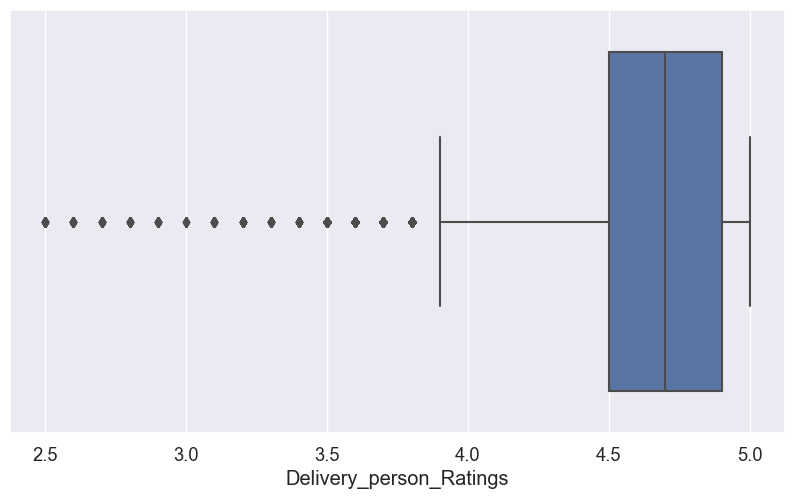

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
24,0x2876,RANCHIRES02DEL01,32.0,3.5,0.000000,0.000000,0.110000,0.110000,08-03-2022,21:35,21:45,Stormy,Jam,1,Snack,scooter,0.0,No,Urban,35
104,0x3f01,MUMRES15DEL01,39.0,3.8,19.176269,72.836721,19.286269,72.946721,16-03-2022,19:55,0.833333333,Windy,Jam,1,Drinks,motorcycle,0.0,No,Metropolitian,37
279,0xa053,JAPRES16DEL03,37.0,3.8,26.849596,75.800512,26.989596,75.940512,04-04-2022,20:45,20:55,Sandstorms,Jam,1,Snack,motorcycle,1.0,No,Metropolitian,42
357,0x7725,PUNERES12DEL01,38.0,3.7,18.520016,73.830547,18.630016,73.940547,25-03-2022,20:30,20:40,Stormy,Jam,1,Meal,motorcycle,1.0,No,Metropolitian,31
359,0x6edb,PUNERES06DEL01,34.0,3.8,18.546258,73.904337,18.656258,74.014337,10-03-2022,18:40,18:55,Stormy,Medium,1,Meal,scooter,0.0,No,Metropolitian,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45291,0x6c66,JAPRES12DEL03,22.0,2.9,26.902908,75.792934,26.992908,75.882934,02-04-2022,22:50,0.958333333,Sunny,Low,2,Drinks,scooter,1.0,No,Metropolitian,33
45356,0xa26b,BANGRES12DEL01,25.0,2.7,12.939496,77.625999,13.009496,77.695999,18-03-2022,23:35,23:45,Sunny,Low,1,Snack,motorcycle,2.0,No,Metropolitian,39
45362,0x2924,COIMBRES11DEL03,31.0,3.4,11.001753,76.986241,11.091753,77.076241,12-03-2022,23:45,23:50,Sunny,Low,0,Meal,motorcycle,1.0,No,Urban,31
45363,0x7ef9,JAPRES02DEL03,34.0,3.8,26.914142,75.805704,27.054142,75.945704,25-03-2022,19:45,0.833333333,Sandstorms,Jam,2,Drinks,scooter,2.0,No,Urban,41


In [14]:
sns.boxplot(data=data, x="Delivery_person_Ratings")
plt.show()
data[data["Delivery_person_Ratings"]<3.9]

In [15]:
data["Delivery_person_Ratings"].describe()

# The other outliers are genuine and significant
# It is wise to keep them since they are genuine data and are not highly influential

count    43585.000000
mean         4.635280
std          0.313851
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: Delivery_person_Ratings, dtype: float64

In [16]:
data[data['multiple_deliveries']==3].sample(10)

# the outliers in multiple_deliveries feature is genuine and significant

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
1240,0x158c,HYDRES09DEL01,34.0,4.7,17.431668,78.408321,17.441668,78.418321,26-03-2022,11:55,12:10,Stormy,High,0,Meal,motorcycle,3.0,No,Metropolitian,44
5357,0xd336,ALHRES010DEL01,35.0,4.0,0.000000,0.000000,0.110000,0.110000,14-02-2022,23:15,23:30,Fog,Low,0,Meal,motorcycle,3.0,No,Metropolitian,44
4003,0x6c28,MYSRES13DEL01,29.0,3.6,12.310972,76.659264,12.320972,76.669264,24-03-2022,11:30,11:45,Sunny,High,0,Buffet,motorcycle,3.0,No,Metropolitian,48
26057,0x859d,JAPRES02DEL03,30.0,4.6,26.914142,75.805704,27.054142,75.945704,16-03-2022,17:25,17:40,Fog,Medium,0,Snack,motorcycle,3.0,No,Metropolitian,49
23496,0x2432,HYDRES17DEL01,29.0,4.6,17.451976,78.385883,17.561976,78.495883,06-04-2022,17:50,17:55,Cloudy,Medium,0,Buffet,motorcycle,3.0,No,Metropolitian,43
6286,0x62e1,BANGRES02DEL01,31.0,4.9,12.970221,77.645396,13.080221,77.755396,14-03-2022,21:15,21:25,Cloudy,Jam,0,Drinks,motorcycle,3.0,No,Semi-Urban,49
2353,0x7951,MYSRES010DEL01,21.0,4.7,12.321214,76.621094,12.431214,76.731094,06-04-2022,20:55,0.875,Cloudy,Jam,0,Snack,motorcycle,3.0,No,Metropolitian,44
18941,0x41a,INDORES20DEL02,NaN,NaN,22.732225,75.874765,22.812225,75.954765,08-03-2022,NaN,19:15,NaN,NaN,3,Buffet,electric_scooter,3.0,No,Metropolitian,53
23732,0x4f56,MUMRES02DEL02,35.0,4.6,19.221315,72.862381,19.301315,72.942381,04-04-2022,18:45,18:55,Cloudy,Medium,0,Buffet,motorcycle,3.0,No,Metropolitian,48
12617,0x21e9,RANCHIRES11DEL03,39.0,4.4,23.359194,85.325447,23.449194,85.415447,27-03-2022,19:55,20:05,Windy,Jam,0,Drinks,motorcycle,3.0,Yes,Metropolitian,54


In [17]:
# negative coordinates are the case of mislabelled data

data['Restaurant_latitude'] = data['Restaurant_latitude'].map(abs)
data['Restaurant_longitude'] = data['Restaurant_longitude'].map(abs)

In [18]:
data.to_csv('../data/cleaned_dataset.csv', index=False)

In [19]:
data.ID.unique().shape

(45493,)

In [20]:
# ID can be dropped from the dataframe
data.drop(columns='ID', inplace=True)

In [1]:
from geopy.distance import geodesic

In [22]:
data["Distance"] = data.apply(lambda x:geodesic(
                                (x["Restaurant_latitude"], x["Restaurant_longitude"]), 
                                (x["Delivery_location_latitude"], x["Delivery_location_longitude"])).km, axis=1)

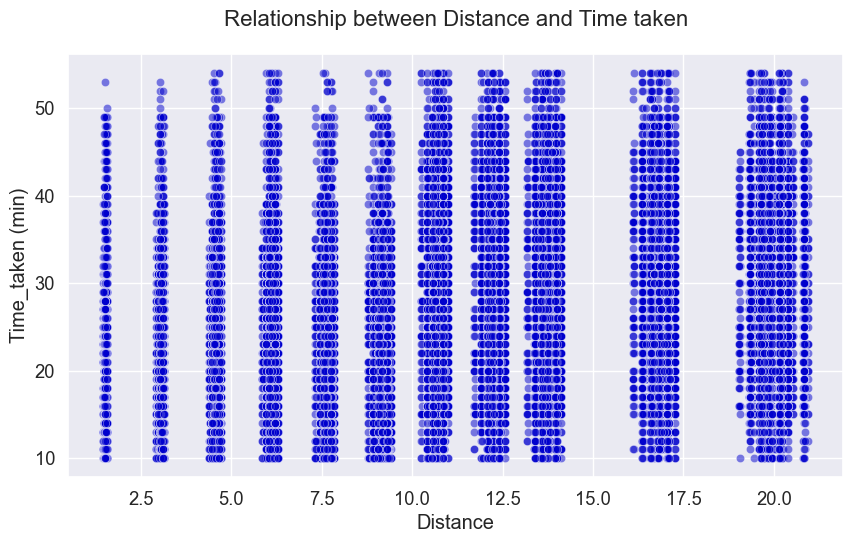

In [23]:
sns.set_style(style='darkgrid')
sns.scatterplot(data=data,x="Distance",y="Time_taken (min)",alpha=0.5, color='mediumblue')
plt.title(label='Relationship between Distance and Time taken', fontsize=16,pad=20)
plt.show()

<Axes: >

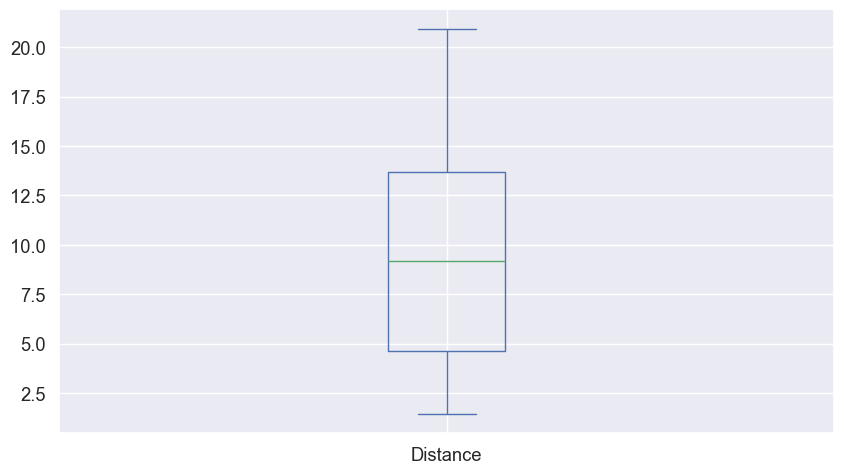

In [24]:
data['Distance'].plot(kind='box')

# there are no outliers for the feature 'Distance', so the data is genuine

In [25]:
# the 'coordinate' features can now be dropped
data.drop(columns=['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'], inplace=True)

In [26]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'], dayfirst=True)
data['Time_Orderd'] = pd.to_datetime(data['Time_Orderd'], errors='coerce')
data['Time_Order_picked'] = pd.to_datetime(data['Time_Order_picked'], errors='coerce')

data['Processing_time'] = (data['Time_Order_picked']-data['Time_Orderd']).dt.components.minutes

In [27]:
import numpy as np

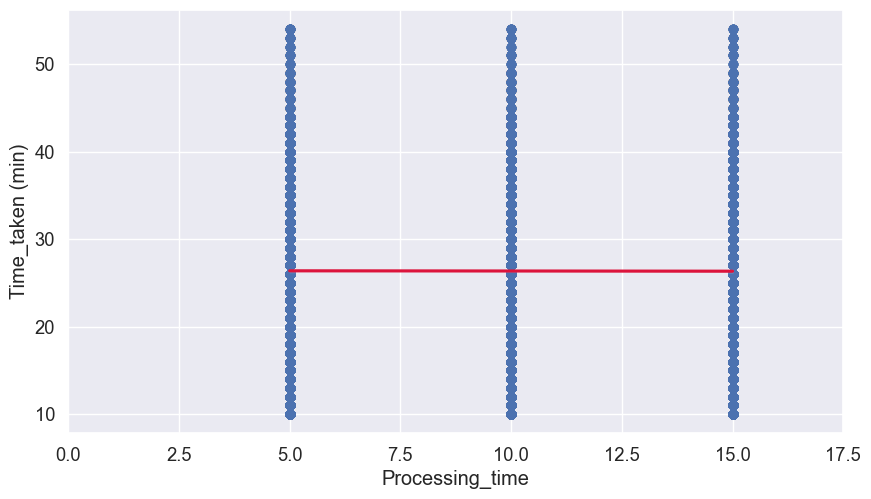

In [28]:
sns.regplot(data=data, y='Time_taken (min)', x='Processing_time', line_kws={'color':'crimson'}, scatter_kws={'alpha':0.4})
plt.xticks(np.arange(0,20,2.5))
plt.show()

In [30]:
# Processing time has no effect on the target variable
data.drop(columns='Processing_time', inplace=True) 

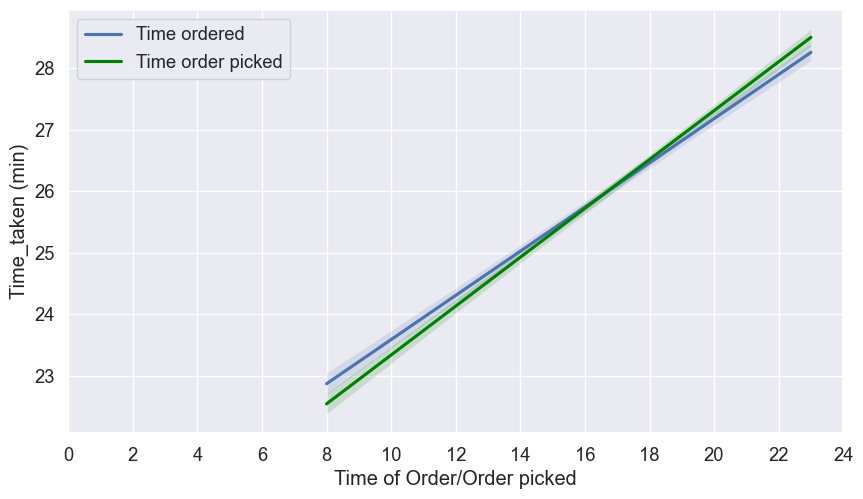

In [31]:
sns.regplot(y=data['Time_taken (min)'], x= data['Time_Orderd'].dt.hour, scatter=False, label='Time ordered')
sns.regplot(y=data['Time_taken (min)'], x=data['Time_Order_picked'].dt.hour,color='green',scatter=False, label='Time order picked')
plt.xticks(np.arange(0,26,2))
plt.xlabel('Time of Order/Order picked')
plt.legend()
plt.show()

In [32]:
data['Time_Order_picked'].dt.hour.corr(data['Time_Orderd'].dt.hour)

0.9977518556102343

In [33]:
# Both the features 'Time_Orderd' and 'Time_Order_picked' are highly correlated and have the same effect on the target feature, so one of them can be dropped
data.drop(columns='Time_Orderd', inplace=True)

In [34]:
# only the hour is significant in 'Time_Order_picked'
# data for hours less than 8 is not available, so using data in that time period may provide incorrect result

data['Time_Order_picked'] = data['Time_Order_picked'].dt.hour

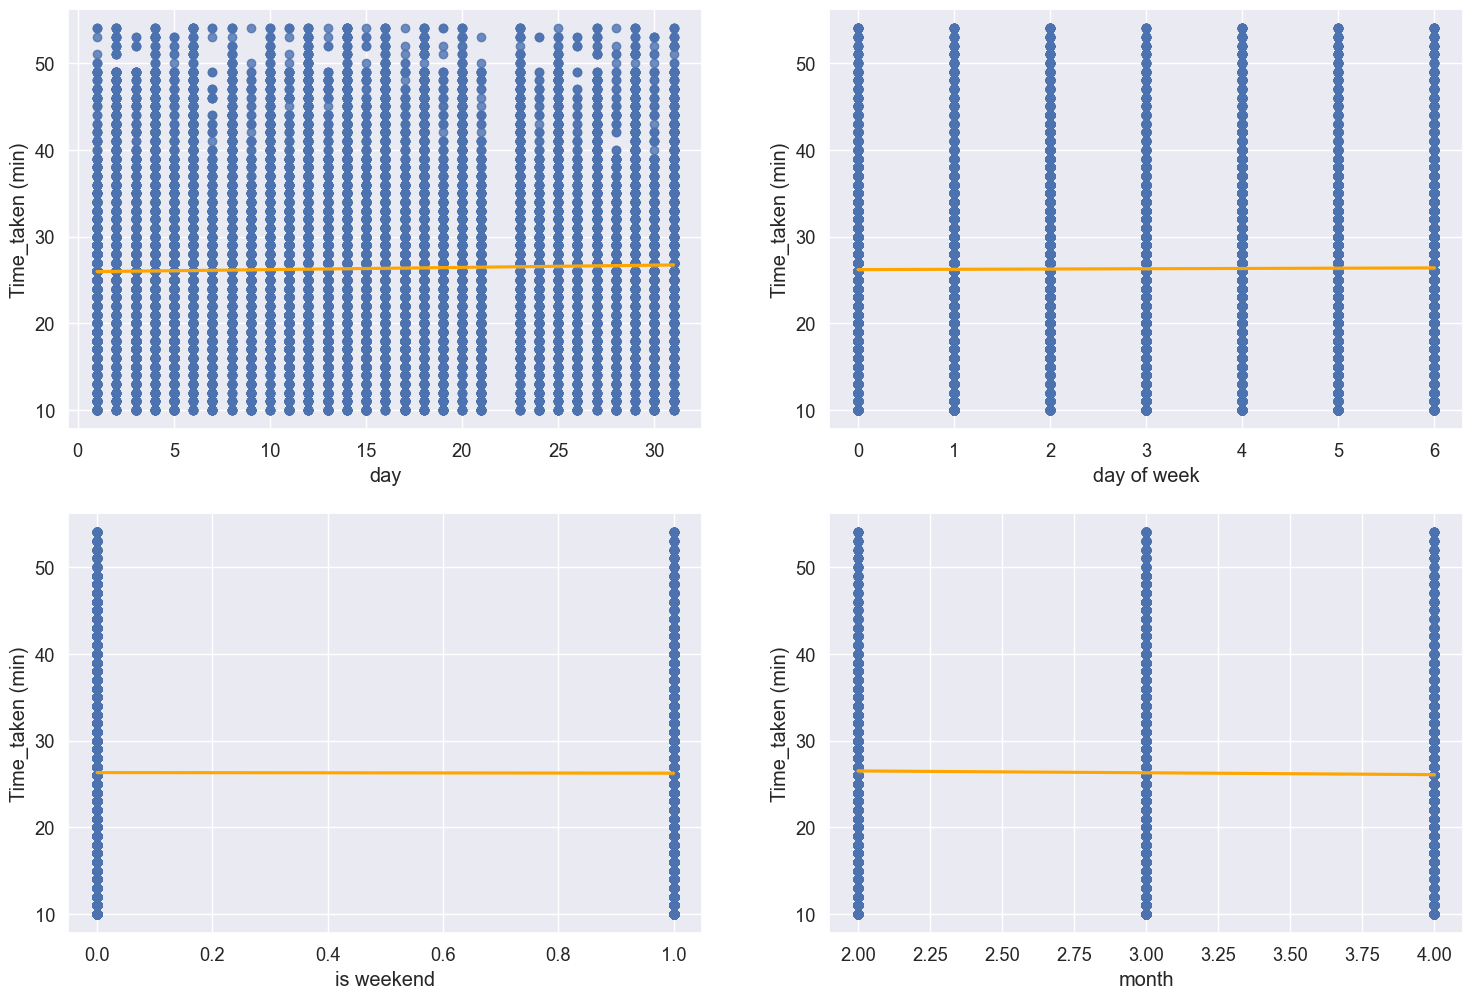

In [35]:
fig,ax = plt.subplots(2,2, figsize=(18,12))

sns.regplot(x=data['Order_Date'].dt.day , y=data['Time_taken (min)'], line_kws={'color':'orange'}, ax=ax[0,0])
ax[0,0].set_xlabel('day')

sns.regplot(x=data['Order_Date'].dt.dayofweek , y=data['Time_taken (min)'], line_kws={'color':'orange'}, ax=ax[0,1])
ax[0,1].set_xlabel('day of week')

sns.regplot(x=data['Order_Date'].dt.day_of_week.isin([5,6]) , y=data['Time_taken (min)'], line_kws={'color':'orange'}, ax=ax[1,0])
ax[1,0].set_xlabel('is weekend')

sns.regplot(x=data['Order_Date'].dt.month , y=data['Time_taken (min)'], line_kws={'color':'orange'}, ax=ax[1,1])
ax[1,1].set_xlabel('month')

plt.show()

In [36]:
# order date has no significant effect on the target feature
# the 'Order_Date' feature can be dropped

data.drop(columns='Order_Date', inplace=True)

In [37]:
numerical_columns = data.columns[data.dtypes!='object']
categorical_columns = data.columns[data.dtypes=='object']

<Axes: >

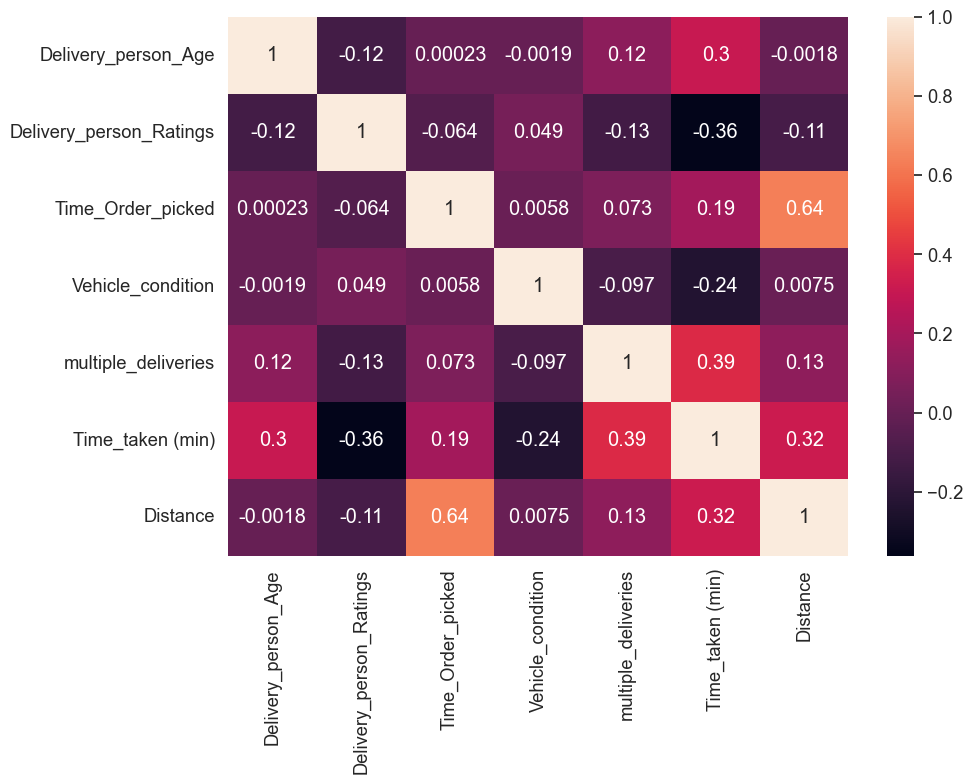

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(data[numerical_columns].corr(), annot=True)

In [39]:
data.sample(5)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance
29879,INDORES06DEL02,35.0,4.8,17.0,Fog,Medium,0,Buffet,motorcycle,2.0,No,Metropolitian,40,19.632315
27765,MYSRES18DEL02,21.0,4.7,18.0,Windy,Medium,2,Buffet,electric_scooter,1.0,No,Metropolitian,16,20.165511
3959,HYDRES16DEL03,34.0,4.7,21.0,Windy,Jam,0,Buffet,motorcycle,2.0,No,Metropolitian,45,9.203840
40861,MUMRES14DEL03,24.0,4.8,17.0,Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,19,9.160879
11405,MUMRES14DEL02,29.0,4.6,8.0,Cloudy,Low,0,Snack,motorcycle,0.0,No,Metropolitian,22,3.053798


In [40]:
data.describe(include=['O']).T

,count,unique,top,freq
Delivery_person_ID,45493,1320,JAPRES11DEL02,67
Weather_conditions,44968,6,Fog,7653
Road_traffic_density,44983,4,Low,15476
Type_of_order,45493,4,Snack,11509
Type_of_vehicle,45493,4,motorcycle,26421
Festival,45265,2,No,44371
City,44295,3,Metropolitian,34023


In [41]:
for col in categorical_columns:
    print(f'{col} : \n{data[col].unique()}')
    print('\n','='*45,'\n')

Delivery_person_ID : 
['DEHRES17DEL01' 'KOCRES16DEL01' 'PUNERES13DEL03' ... 'KOCRES04DEL01'
 'BHPRES06DEL03' 'GOARES03DEL03']


Weather_conditions : 
['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny' nan]


Road_traffic_density : 
['Jam' 'High' 'Medium' 'Low' nan]


Type_of_order : 
['Snack' 'Meal' 'Drinks' 'Buffet']


Type_of_vehicle : 
['motorcycle' 'scooter' 'electric_scooter' 'bicycle']


Festival : 
['No' 'Yes' nan]


City : 
['Metropolitian' 'Urban' 'Semi-Urban' nan]





 Weather_conditions 



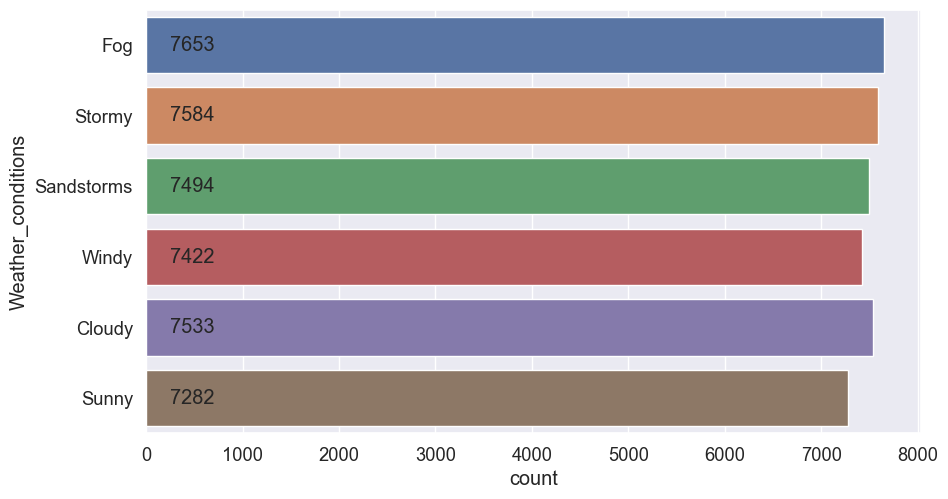

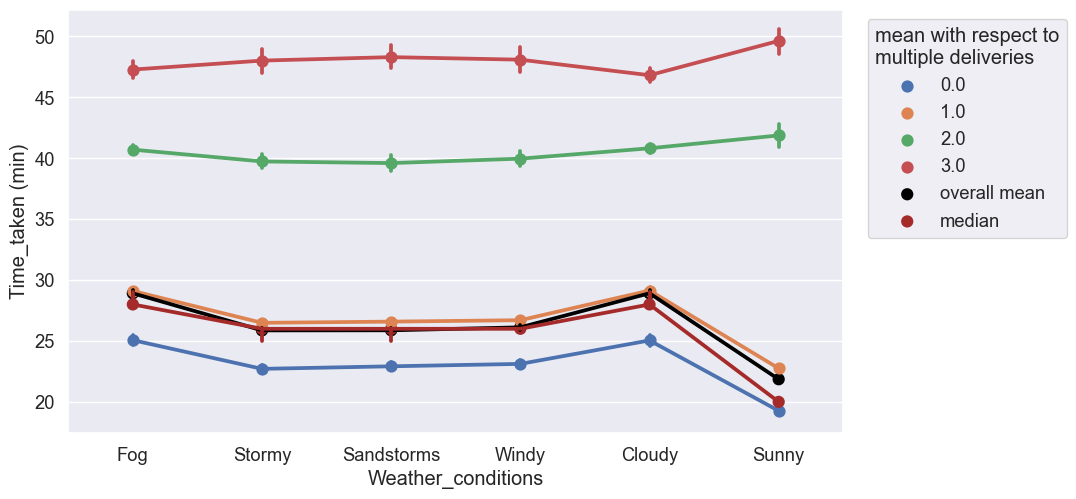


 Road_traffic_density 



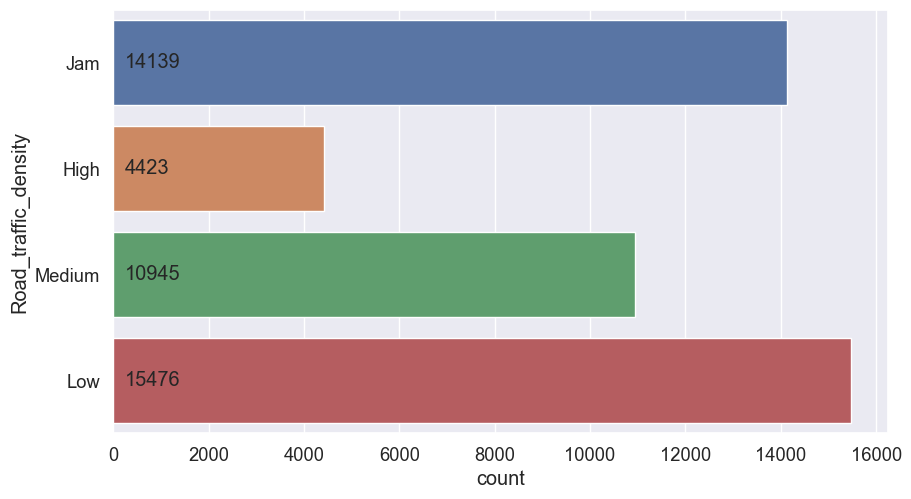

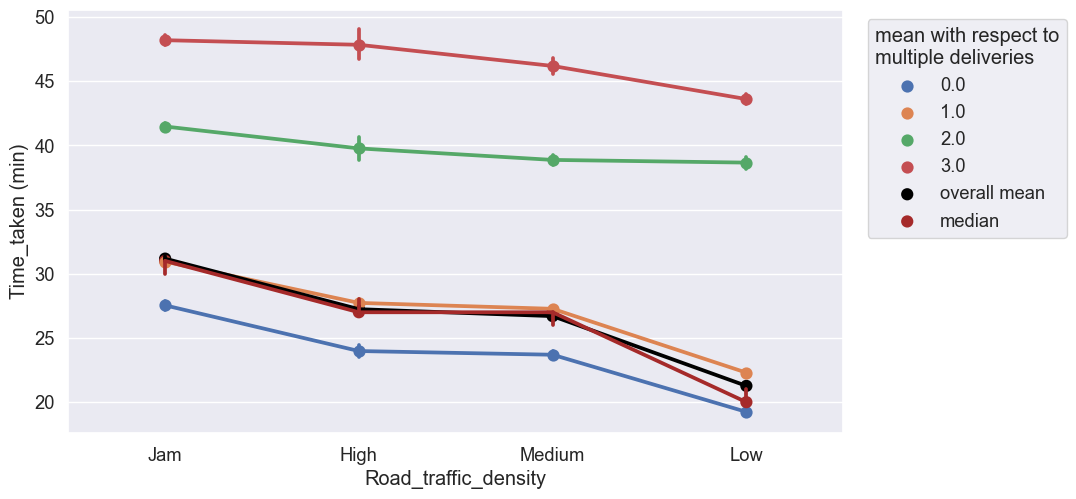


 Type_of_order 



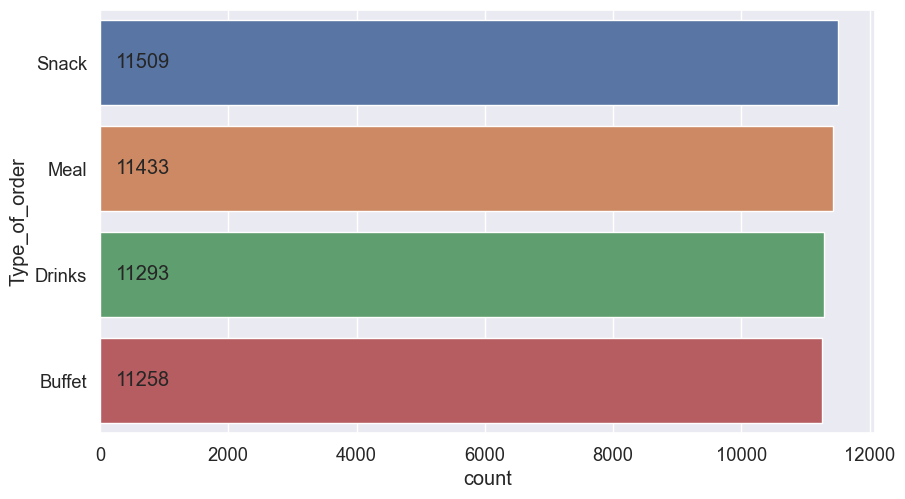

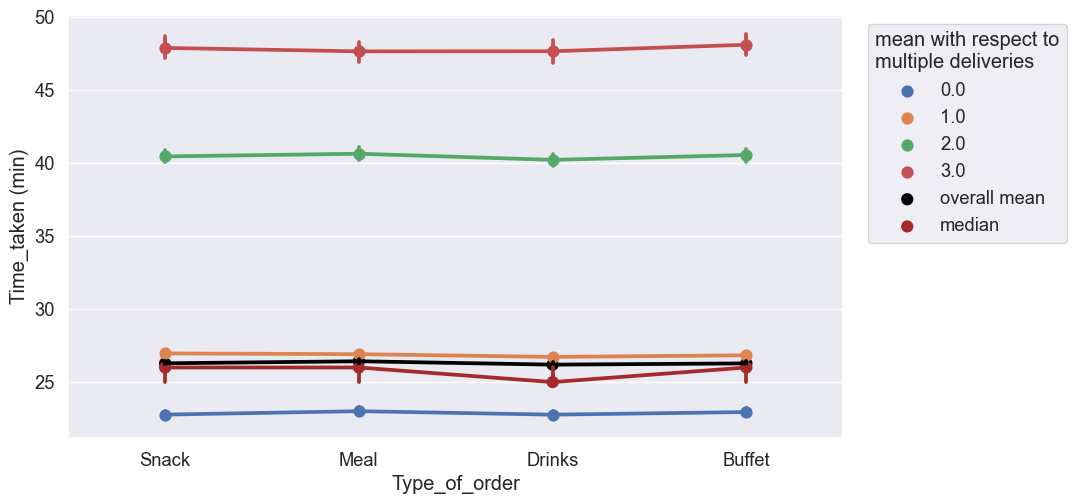


 Type_of_vehicle 



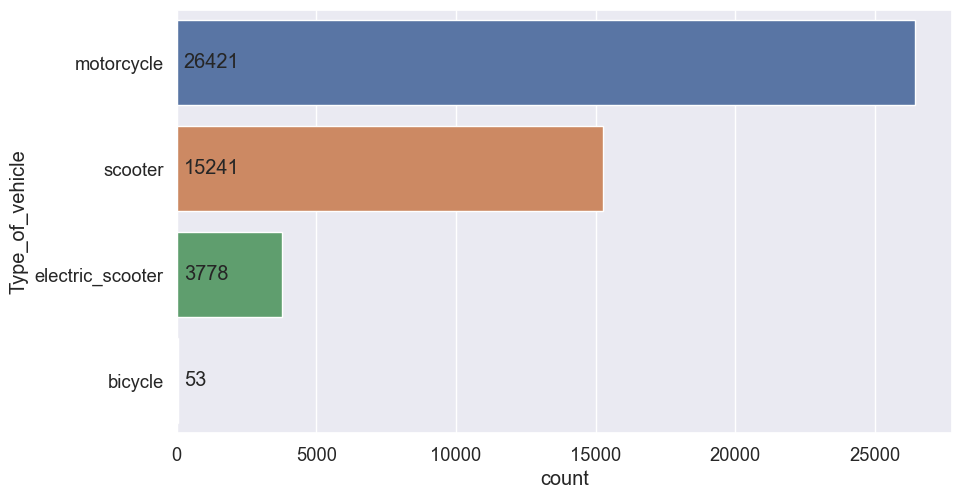

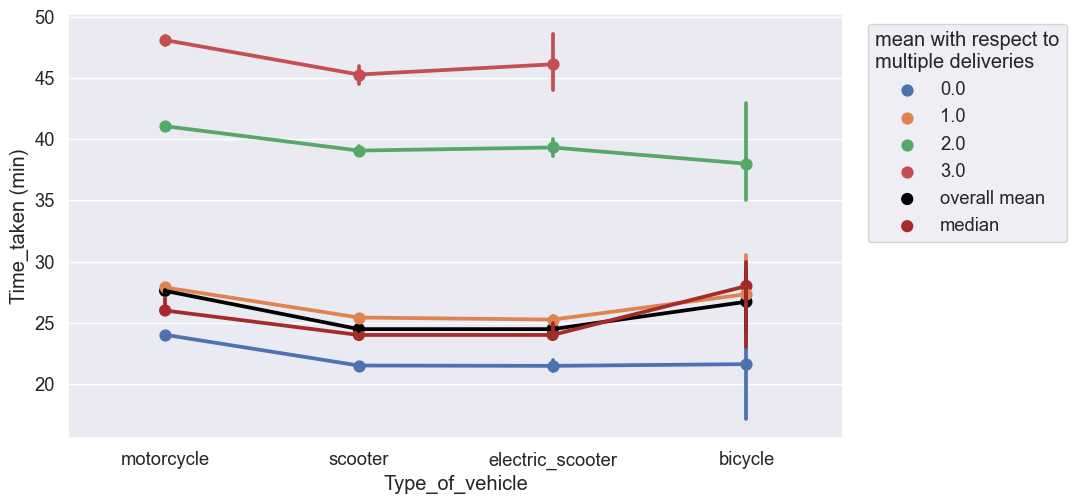


 Festival 



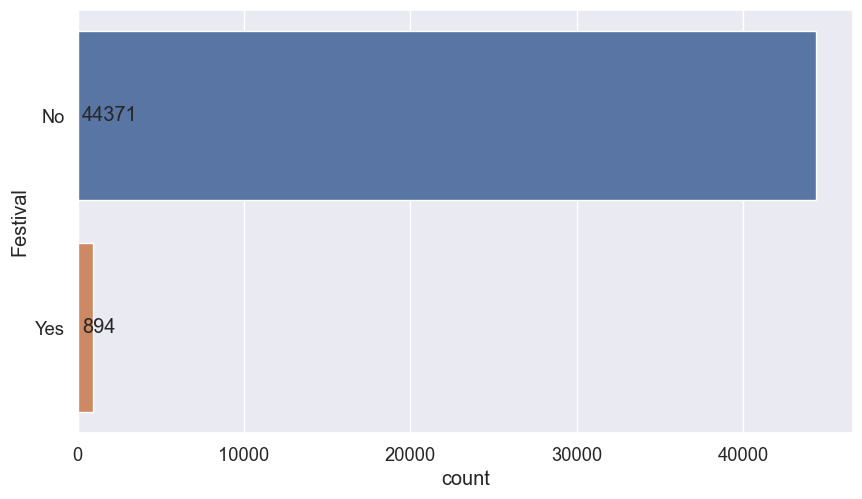

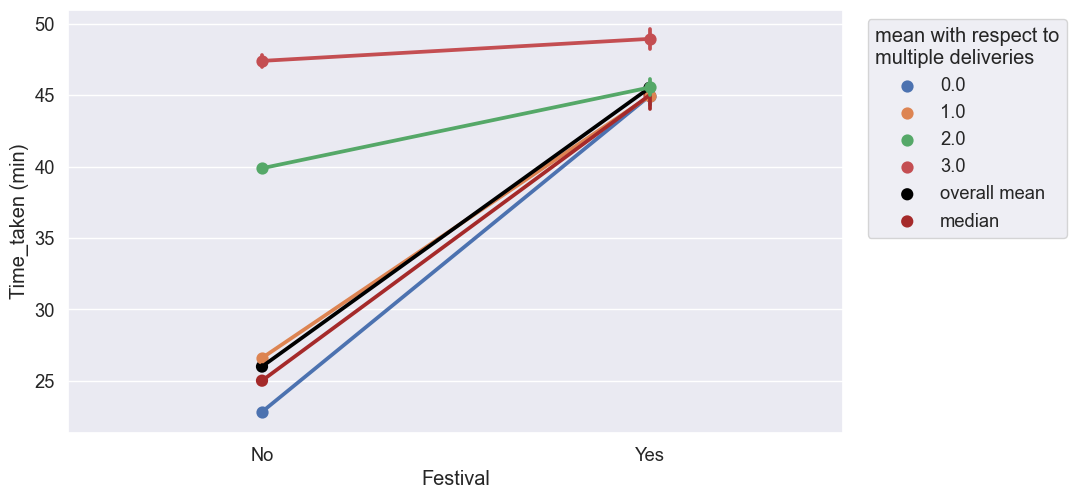


 City 



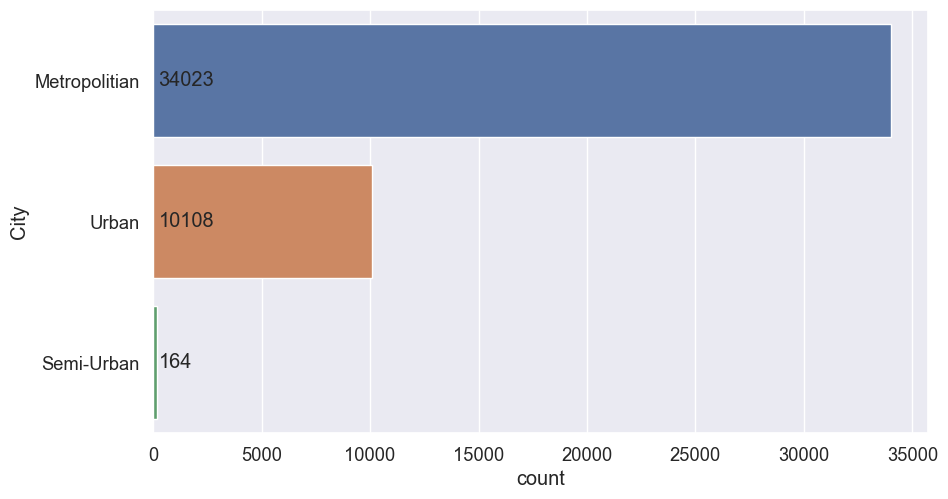

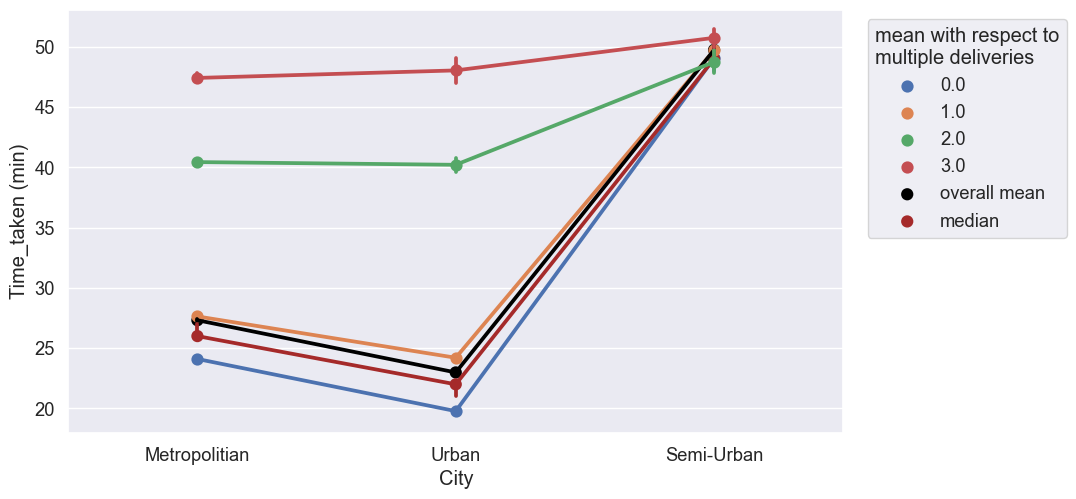

In [42]:
for feature in categorical_columns.drop('Delivery_person_ID'):
    print('='*150)
    print('\n',feature,'\n')
    
    ax=sns.countplot(data, y=feature)
    for p in ax.patches:
        width=p.get_width()
        ax.text(p.get_x()+250,
            p.get_y() + p.get_height() / 2,
            int(width),
            ha = 'left',
            va = 'center')
    plt.show()

    sns.pointplot(data, x=feature, y='Time_taken (min)', hue='multiple_deliveries')
    sns.pointplot(data, x=feature, y='Time_taken (min)', color='black', label='overall mean')
    sns.pointplot(data, x=feature, y='Time_taken (min)', estimator='median', color='brown', label='median')
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right').set_title('mean with respect to\nmultiple deliveries')
    plt.show()


 Weather_conditions 



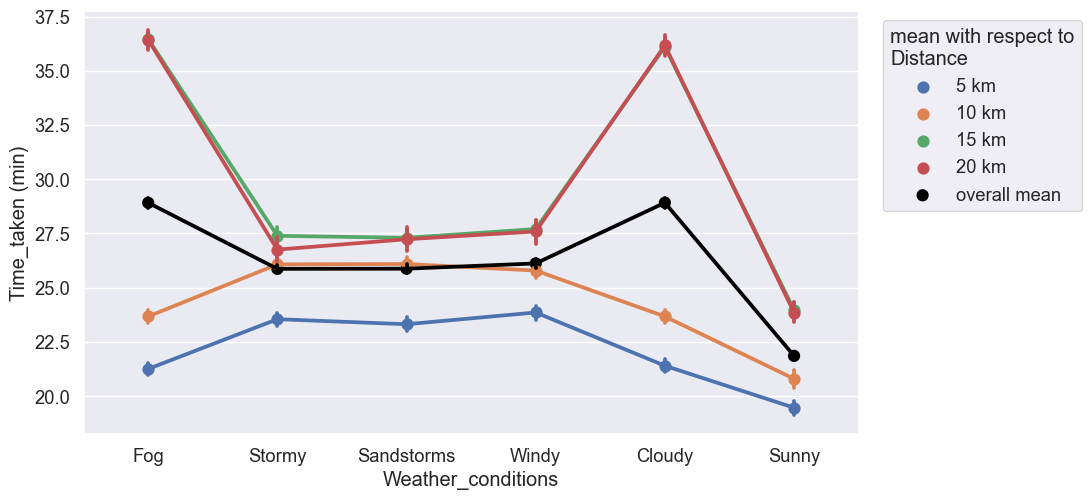


 Type_of_vehicle 



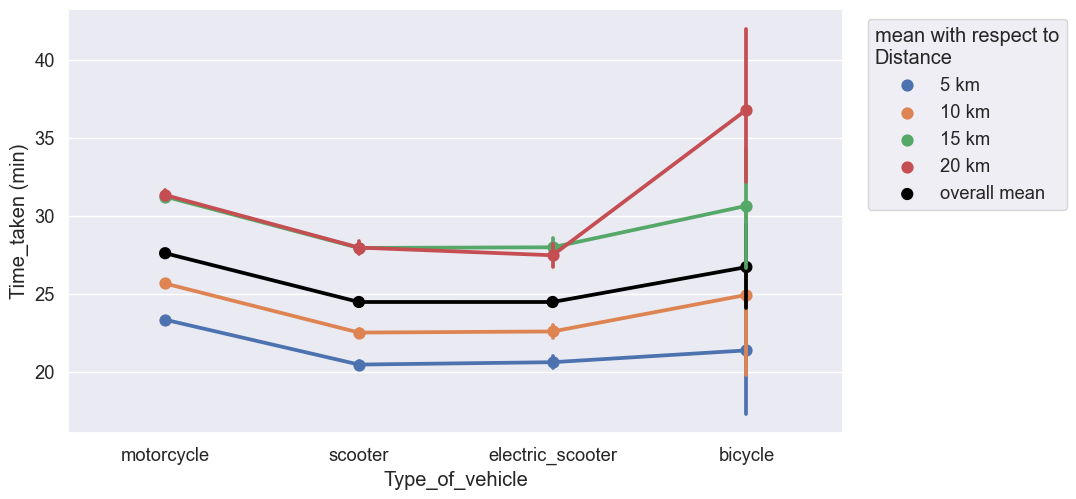


 Type_of_order 



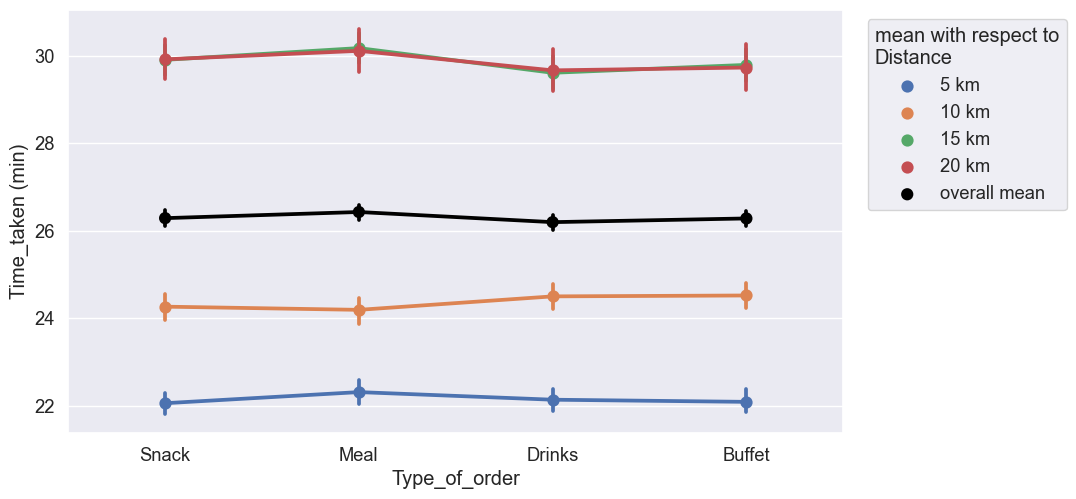

In [43]:
distance_bins = pd.cut(data['Distance'], np.arange(0,25,5), labels= [str(i)+' km' for i in np.arange(5,25,5)])

for feature in ['Weather_conditions','Type_of_vehicle', 'Type_of_order']:
    print('='*150)
    print('\n',feature,'\n')
    
    sns.pointplot(data, x=feature, y='Time_taken (min)', hue= distance_bins)
    sns.pointplot(data, x=feature, y='Time_taken (min)', color='black', label='overall mean')
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right').set_title('mean with respect to\nDistance')
    plt.show()

In [44]:
# Type_of_order has little to no effect on the target variable
data.drop(columns='Type_of_order', inplace=True)

In [45]:
Weather_conditions_map={'Fog':3,'Cloudy':3,'Stormy':2,'Sandstorms':2,'Windy':2,'Sunny':1}
Road_traffic_density_map={'Jam':4, 'High':3, 'Medium':2, 'Low':1}
Type_of_vehicle_map={'motorcycle':2, 'bicycle':2, 'scooter':1, 'electric_scooter':1}
Festival_map={'Yes':1, 'No':0}
City_map={'Semi-Urban':3, 'Metropolitian':2, 'Urban':1} 

In [46]:
data['Weather_conditions'] = data['Weather_conditions'].map(Weather_conditions_map)
data['Road_traffic_density'] = data['Road_traffic_density'].map(Road_traffic_density_map)
data['Type_of_vehicle'] = data['Type_of_vehicle'].map(Type_of_vehicle_map)
data['Festival'] = data['Festival'].map(Festival_map)
data['City'] = data['City'].map(City_map)

In [48]:
# since the number of categories for the Delivery_person_ID feature is large, target guided ordinal encoding is used to encode the feature.
# The mean Time taken for the delivery person is for encoding

ID_map = data.groupby('Delivery_person_ID')['Time_taken (min)'].mean()

In [49]:
data['Delivery_person_ID'] = data['Delivery_person_ID'].map(lambda x:ID_map[x])

In [54]:
data.sample(5)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance
6796,25.298246,39.0,4.5,9.0,2.0,1.0,2,1,0.0,0.0,2.0,24,3.098357
11008,28.517241,22.0,4.2,21.0,2.0,4.0,0,2,1.0,0.0,2.0,33,10.736507
27020,27.250000,25.0,4.8,19.0,3.0,4.0,1,1,1.0,0.0,2.0,28,7.757289
12981,28.000000,26.0,4.9,8.0,1.0,1.0,1,1,1.0,0.0,2.0,19,3.109767
31988,25.555556,26.0,4.7,22.0,2.0,4.0,2,1,0.0,0.0,2.0,20,20.141420


In [56]:
numerical_columns = ['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings', 'Time_Order_picked', 'Time_taken (min)', 'Distance']
categorical_columns = ['Weather_conditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_vehicle', 'multiple_deliveries',	'Festival', 'City']

In [98]:
numerical_fill_map = data[numerical_columns].median().to_dict()
categorical_fill_map = data[categorical_columns].mode().loc[0].to_dict()

data[numerical_columns] = data[numerical_columns].fillna(numerical_fill_map)
data[categorical_columns] = data[categorical_columns].fillna(categorical_fill_map)

In [103]:
data.sample(5)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance
5531,23.800000,23.0,4.7,17.0,3.0,2.0,0,2,0.0,0.0,1.0,24,9.307824
3660,25.161290,36.0,4.4,21.0,2.0,4.0,0,2,1.0,0.0,1.0,51,12.235645
1668,29.000000,39.0,4.6,12.0,2.0,3.0,1,1,1.0,0.0,2.0,26,6.276139
13730,25.982759,23.0,4.7,16.0,1.0,2.0,0,2,1.0,0.0,1.0,19,6.071635
8042,24.316667,31.0,4.7,21.0,3.0,4.0,0,2,1.0,0.0,1.0,46,10.859536


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45493 entries, 0 to 45583
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_ID       45493 non-null  float64
 1   Delivery_person_Age      45493 non-null  float64
 2   Delivery_person_Ratings  45493 non-null  float64
 3   Time_Order_picked        45493 non-null  float64
 4   Weather_conditions       45493 non-null  float64
 5   Road_traffic_density     45493 non-null  float64
 6   Vehicle_condition        45493 non-null  int64  
 7   Type_of_vehicle          45493 non-null  int64  
 8   multiple_deliveries      45493 non-null  float64
 9   Festival                 45493 non-null  float64
 10  City                     45493 non-null  float64
 11  Time_taken (min)         45493 non-null  int64  
 12  Distance                 45493 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 5.9 MB
